In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

C:\Users\nito8\AppData\Local\Temp\ipykernel_10884\3626671341.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="max")
[*********************100%***********************]  1 of 1 completed


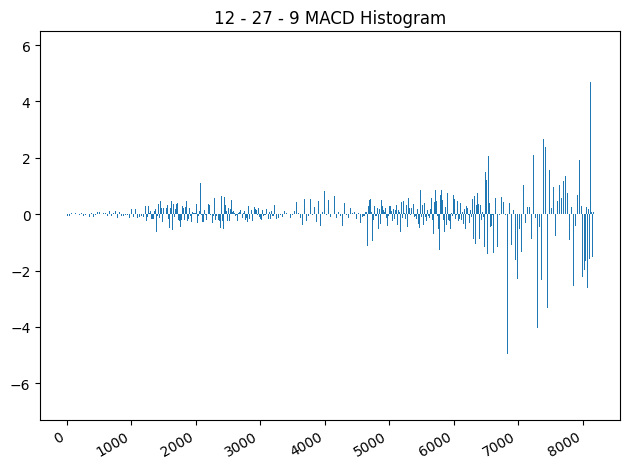

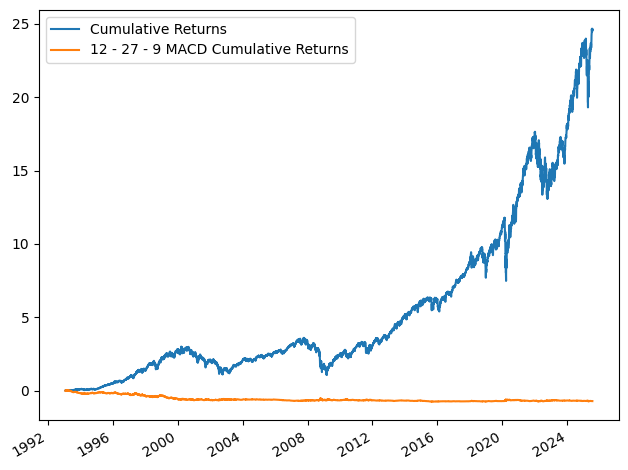

Price,Close,High,Low,Open,Volume,12_ema,27_ema,MACD,Signal,MACD_hist,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,,,
1993-02-01,24.553850,24.553850,24.397788,24.397788,480500,24.474368,24.470354,0.004014,0.002230,0.001784,-1.0,0.007113,-0.007113
1993-02-02,24.605867,24.623208,24.484485,24.536506,201300,24.525692,24.518911,0.006782,0.004095,0.002686,1.0,0.009246,-0.005009
1993-02-03,24.865974,24.883315,24.623210,24.640551,529400,24.633106,24.615546,0.017560,0.008657,0.008903,1.0,0.019915,0.005508
1993-02-04,24.970009,25.022030,24.675224,24.952669,531500,24.724641,24.697315,0.027326,0.014210,0.013116,1.0,0.024182,0.009715
1993-02-05,24.952667,25.004688,24.813945,24.952667,492100,24.780064,24.748128,0.031935,0.019015,0.012920,1.0,0.023471,0.009014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-10,625.820007,626.869995,623.010010,624.200012,57529000,617.358333,606.923469,10.434864,9.851123,0.583741,1.0,24.668944,-0.709832
2025-07-11,623.619995,624.859985,621.530029,622.739990,63670200,618.321665,608.116078,10.205587,9.922016,0.283572,1.0,24.578708,-0.710853
2025-07-14,624.809998,625.159973,621.799988,623.159973,51898500,619.319870,609.308501,10.011370,9.939886,0.071483,1.0,24.627517,-0.710301


In [19]:
TICKER = 'SPY'
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9
LOOKBACK = 10000

def get_data(ticker = TICKER, lookback = LOOKBACK):
    df = yf.download(ticker, period="max")
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-lookback:, :]

def add_MACD(df, fast=MACD_FAST, slow=MACD_SLOW, span=MACD_SPAN):
    df[f'{fast}_ema'] = df['Close'].ewm(span=fast).mean()
    df[f'{slow}_ema'] = df['Close'].ewm(span=slow).mean()

    # MACD line is the difference between the fast and slow moving averages
    df[f'MACD'] = df[f'{fast}_ema'] -  df[f'{slow}_ema']

    # MACD signal is a span-period moving average of the line
    df['Signal'] = df['MACD'].ewm(span=span).mean()

    df['MACD_hist'] = df['MACD'] - df['Signal']

    plt.bar(x=range(len(df)), height=df['MACD_hist'])
    plt.title(f'{fast} - {slow} - {span} MACD Histogram')
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

    return df 

def add_strategy(df):
    df['Strategy'] = 0
    df['Strategy'] = np.where(df['MACD_hist'] > 0, 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df, fast=MACD_FAST, slow=MACD_SLOW, span=MACD_SPAN):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    plt.figure()
    plt.plot(df['Asset_Returns'], label='Cumulative Returns')
    plt.plot(df['Strategy_Returns'], label=f'{fast} - {slow} - {span} MACD Cumulative Returns')
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()
    return df.dropna()

def main():
    df = get_data()
    df = add_MACD(df)
    df = add_strategy(df)
    df = test_strategy(df)

    return df

main()

C:\Users\nito8\AppData\Local\Temp\ipykernel_10268\652272769.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="max")
[*********************100%***********************]  1 of 1 completed


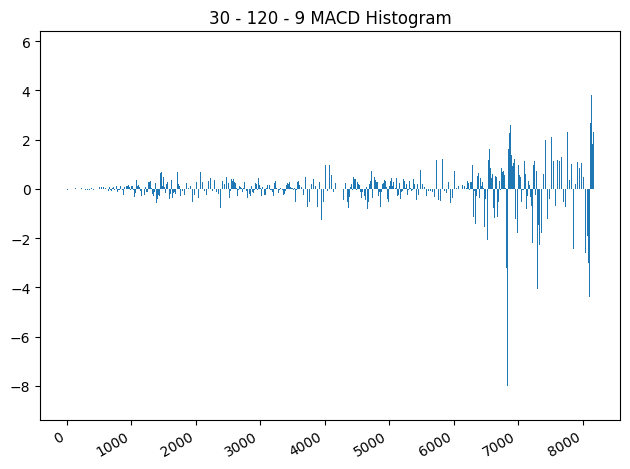

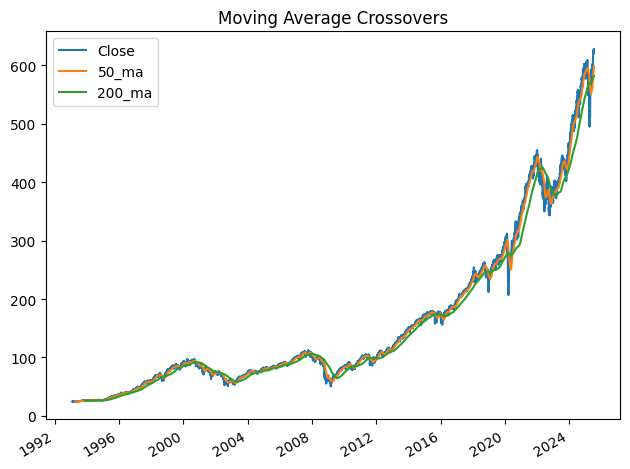

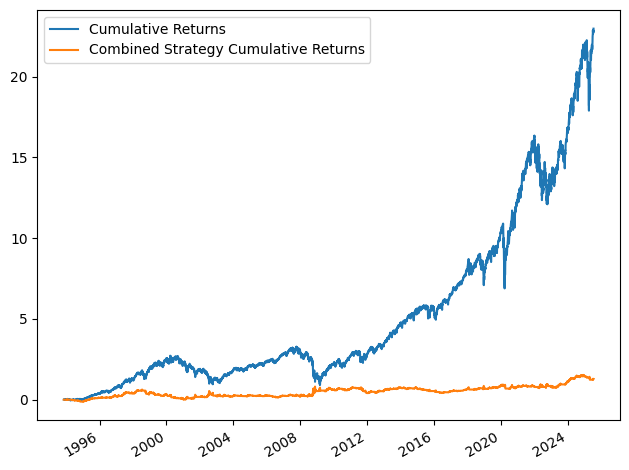

Price,Close,High,Low,Open,Volume,30_ema,120_ema,MACD,Signal,MACD_hist,50_ma,200_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,,,,,
1993-11-12,26.323572,26.411847,26.235297,26.252952,108200,26.189559,25.777769,0.411791,0.434468,-0.022677,26.114034,25.317936,0.0,0.004717,0.000000
1993-11-15,26.305923,26.376543,26.235304,26.376543,243300,26.197067,25.786811,0.410256,0.429626,-0.019369,26.119398,25.326697,0.0,0.004044,0.000000
1993-11-16,26.429501,26.447156,26.252951,26.358881,492600,26.212063,25.797807,0.414256,0.426552,-0.012296,26.130742,25.335815,0.0,0.008760,0.000000
1993-11-17,26.288263,26.447158,26.217643,26.447158,39600,26.216979,25.806193,0.410785,0.423398,-0.012613,26.141016,25.342926,0.0,0.003370,0.000000
1993-11-18,26.217640,26.305915,26.147020,26.252950,240800,26.217021,25.813225,0.403796,0.419478,-0.015682,26.148824,25.349164,0.0,0.000674,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-11,623.619995,624.859985,621.530029,622.739990,63670200,606.277479,583.131375,23.146105,20.424204,2.721901,593.514197,580.819700,1.0,22.802310,1.267668
2025-07-14,624.809998,625.159973,621.799988,623.159973,51898500,607.473125,583.820277,23.652848,21.069933,2.582915,594.952288,581.121812,1.0,22.847730,1.271995
2025-07-15,622.140015,627.859985,622.059998,627.520020,74317300,608.419376,584.453662,23.965715,21.649089,2.316626,596.258611,581.402498,1.0,22.745822,1.262286


In [6]:
# Combining MACD with MA crossovers
TICKER = 'SPY'
MACD_FAST = 30
MACD_SLOW = 120
MACD_SPAN = 9
MA_FAST = 50
MA_SLOW = 200
LOOKBACK = 10000

def get_data(ticker = TICKER, lookback = LOOKBACK):
    df = yf.download(ticker, period="max")
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-lookback:, :]

def add_MACD(df, fast=MACD_FAST, slow=MACD_SLOW, span=MACD_SPAN):
    df[f'{fast}_ema'] = df['Close'].ewm(span=fast).mean()
    df[f'{slow}_ema'] = df['Close'].ewm(span=slow).mean()

    # MACD line is the difference between the fast and slow moving averages
    df[f'MACD'] = df[f'{fast}_ema'] -  df[f'{slow}_ema']

    # MACD signal is a span-period moving average of the line
    df['Signal'] = df['MACD'].ewm(span=span).mean()

    df['MACD_hist'] = df['MACD'] - df['Signal']

    plt.bar(x=range(len(df)), height=df['MACD_hist'])
    plt.title(f'{fast} - {slow} - {span} MACD Histogram')
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

    return df 

def add_moving_averages(df, fast=MA_FAST, slow=MA_SLOW):
    df[f'{fast}_ma'] = df['Close'].rolling(fast).mean()
    df[f'{slow}_ma'] = df['Close'].rolling(slow).mean()

    plt.plot(df['Close'], label='Close')
    plt.plot(df[f'{fast}_ma'], label=f'{fast}_ma')
    plt.plot(df[f'{slow}_ma'], label=f'{slow}_ma')
    plt.legend()
    plt.title('Moving Average Crossovers')
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()
    return df.dropna()

def add_strategy(df, fast=MA_FAST, slow=MA_SLOW):
    df['Strategy'] = 0
    cond1 = df[f'{fast}_ma'] > df[f'{slow}_ma']
    cond2 = df['MACD_hist'] > 0
    conditions = [cond1 & cond2, ~cond1 & ~cond2]
    choices = [1, -1]
    df['Strategy'] = np.select(conditions, choices)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df, fast=MACD_FAST, slow=MACD_SLOW, span=MACD_SPAN):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    plt.figure()
    plt.plot(df['Asset_Returns'], label='Cumulative Returns')
    plt.plot(df['Strategy_Returns'], label=f'Combined Strategy Cumulative Returns')
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()
    return df.dropna()

def main():
    df = get_data()
    df = add_MACD(df)
    df = add_moving_averages(df)
    df = add_strategy(df)
    df = test_strategy(df)

    return df

main()